# NFL Big Data

**By Zach Brazil**

#### Github

https://github.com/zbrazil/NFL-Big-Data

## Abstract

The NFL is the most popular sport in the United States. It brings hard hitting, action-packed entertainment on a weekly basis and really allows fans from around the country to come together and cheer for their favorite team! However, there is something a little more intriguing about the game of football... Data! Every single play brings countless amounts of data to compute and understand and that's exactly what we're going to do. As a team, we derived many questions to answer given play-by-play data, data about the game itself (weather, time of day, etc...), and player data (college, position, etc...). Using NFL Next Gen Stats, we will aim to show easy to read/understand visualizations of different data!

What to look forward to:

1. Which offensive schemes resulted in the most yards per play?

2. What was the liklihood of an offense scoring points in each quarter?

3. Which colleges produced the most NFL caliber players?

4. Which positions are most abundant in the NFL?

5. Which defenses gave up the most/least pass yards per game?

6. Which defense got the most/least sacks?

7. Which offensive line allowed the most/least sacks?

## Getting Set Up

Before we start answering these quesitons, we first need the data itself. Below, we import all the csv files we need from the data the NFL provided. The data was located on kaggle.com under *NFL-Big-Data-Bowl-2021.* The datasets we used were **games.csv, players.csv**, and **plays.csv**. We will explain what each csv file contains in just a moment.

So to kick things off we will first import packages we will need for data wrangling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Just like that, we have the necessary packages to continue on! Next, we will import the datasets we want. The first of which will be the **games.csv** file. This file contains several columns but the ones we are most interested in, in the context of this project, are the home and away teams for each game and the gameID. The gameID will be important for combining two dataframes together later on!

In [2]:
games = pd.read_csv('https://raw.githubusercontent.com/zbrazil/NFL-Big-Data/main/games.csv')

Let's take a look at the dataset to make sure all is correct.

In [3]:
games.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


Everything looks good! Now we can import the next file into this notebook. The second file is the **players.csv** dataset. This file contains information about each NFL player from the 2018 season. 

In [4]:
players = pd.read_csv('https://raw.githubusercontent.com/zbrazil/NFL-Big-Data/main/players.csv')

Again, let's make sure the dataset looks good.

In [5]:
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


Everything looks good, now we can move on to the final dataset, **plays.csv**. This file contains each pass play from every game of the 2018 NFL regular season. So it's quite extensive. 

In [6]:
plays = pd.read_csv('https://raw.githubusercontent.com/zbrazil/NFL-Big-Data/main/plays.csv')

Like the last two files, let's make sure all looks good.

In [7]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


Now we can get started with interesting stuff!

## Which Offensive Play Type Got the Most Yards Per Play?

When watching football for the first time it might just seem as if the players are running around trying to get open, which is true. However, there are detailed routes and specific formations each offense executes every single play. Different play types work against different teams and the offense's goal is to get as many yards as possible out of every single play. Here we will take a look at which offensive scheme worked the best throughout the season. 

Each offensive scheme was available in the **plays.csv** file so we will be using that for this question.

To solve this question, all we have to do is group by the offensive play type, and take the mean of each result.

In [8]:
scheme = plays.groupby('typeDropback')['offensePlayResult'].mean()
scheme.sort_values(axis = 0, inplace = True)
scheme

typeDropback
UNKNOWN                   2.164948
SCRAMBLE                  2.608567
SCRAMBLE_ROLLOUT_RIGHT    4.699818
SCRAMBLE_ROLLOUT_LEFT     5.244589
DESIGNED_ROLLOUT_RIGHT    6.230290
TRADITIONAL               6.777501
DESIGNED_ROLLOUT_LEFT     7.716312
Name: offensePlayResult, dtype: float64

Now we have our values! Let's plot it to make an easy visualization!

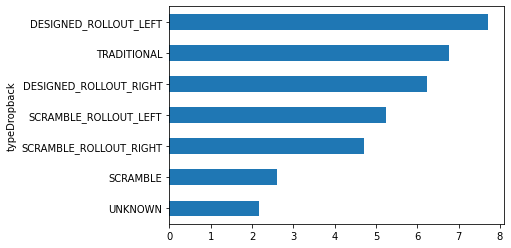

In [9]:
scheme.plot.barh();

We can see that when the quarterback was supposed to run out to the left side of the field and throw the ball, it resulted in the most yards per play at almost 8 yards! Unknown's resulted in the least (these plays are most likely balls that were thrown out of bounds on purpose, balls that were spiked to the ground (time management play call) or were disrupted by the defense straight from the beginning).

## Which Quarter Had the Best Liklihood of the Offense Scoring Points?

Continuing with the same dataset, let's try to figure out which quarters were expected to have the offense score more often. Here, we will be looking at the expected points (epa) column. This column will calculate the likelihood of the offense scoring based off the result of the previous play. So, for example, if an offense gains 30 yards the likelihood of them scoring just went up. On the other hand, if the offense gets sacked on a play and loses yards the epa will drop significantly.

Let's group by quarter and take the various stats of each epa value from every quarter.

In [10]:
epa = plays.groupby('quarter')['epa'].describe()
epa = epa.iloc[:,3:] # selects the columns we need, and gets rid of the ones we don't need.
epa

,min,25%,50%,75%,max
quarter,,,,,
1,-9.598099,-0.879416,-0.249197,1.161083,8.397043
2,-11.372110,-0.586638,-0.157814,0.821354,7.250655
3,-10.175076,-0.909204,-0.275452,1.102170,8.629316
4,-11.935951,-0.706726,-0.172343,0.905896,6.551236
5,-4.575518,-0.738867,-0.176736,0.683437,3.734824


Now, we will chart a boxplot to see the distribution and mean value from each quarter.

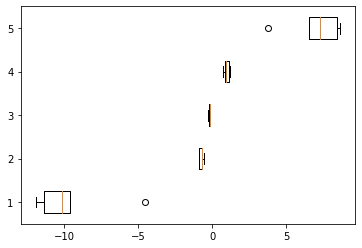

In [11]:
plt.boxplot(epa, vert = False);

The boxplot above shows us that in the fifth quarter (overtime), the expected points value was at its greatest. Even its minimum value is greater than the max for any other quarter. Scoring in general had an increased liklihood as the game progressed as the mean (orange line) for every quarter is greater than the previous. The progression could be a result of the defense becoming fatigued, or the offense figuring out the defensive schemes and using offesive schemes that work best against that specific defense.

## Top Colleges For Future NFL Players

When it comes time to choose a college to play football for, it shouldn't surprise people that players typically want to attend universities that have a mulititude of alumni currently in the NFL. So, let's make things easy for these high school recruits and view the top 20 colleges in the nation for the amount of players that got drafted/picked up by an NFL team and are currently playing in 2018. 

In [12]:
players['collegeName'].value_counts().head(20)

Alabama                33
Ohio State             28
Florida State          27
Florida                26
Louisiana State        25
Miami                  24
Georgia                23
Clemson                23
Stanford               22
Oklahoma               20
Washington             20
Penn State             19
Auburn                 19
Notre Dame             19
Southern California    18
South Carolina         18
Texas                  18
Texas A&M              17
Central Florida        16
Michigan               15
Name: collegeName, dtype: int64

What we can see here are the top 20 colleges. All we had to do was take the **players.csv** dataset, select the column of interest (collegeName) and count the amount of instances in which it appeared in that column. 

For easy viewing, let's make a bar plot to see a visible difference between each university. 

<AxesSubplot:>

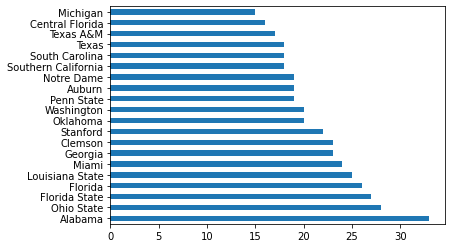

In [13]:
top_colleges = players['collegeName'].value_counts().head(20)
top_colleges.plot.barh()

As we can see, there is quite a difference between the No. 1 college, Alabama, and the No. 20 college, Mississippi. That's not a knock on Ole Miss either, it just shows how dominant the Alabama football program is, and how NFL organizations view the players coming out of that college.

## Which Positions Are The Most Abundant in the NFL?

The question is quite self-explainatory, so let's dig right in. Using the same **players.csv** dataset, we will count the instances of each position by adding up each time a position has occured.

In [14]:
players['position'].value_counts()

WR     228
CB     195
RB     135
TE     128
OLB    100
QB      71
FS      65
SS      58
LB      58
ILB     56
DE      49
DB      33
MLB     29
DT      28
FB      19
P       13
LS      12
S       11
NT       5
K        5
HB       5
Name: position, dtype: int64

For easy visualization, let's create a similar bar plot to the one we created above.

<AxesSubplot:>

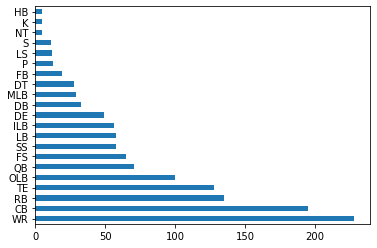

In [15]:
abundance = players['position'].value_counts()
abundance.plot.barh()

As we can see, there is a clear priority in who teams draft and keep on there roster. For positions like wide reciever (WR), and cornerback (CB), these positions are typically the most injury prone and a lot of depth is needed in case one goes down. Unlike kickers (K) where they don't get hit very often and are more likely to stay healthy thoughout the season.

Now, let's move on to a different dataset.

## Which Defense Gave Up the Most/Least Passing Yards Per Game?

In a pass first league, having a good defense against the pass is almost needed in order to be in contention for the Lombardi Trophy. Quarterbacks are putting up numbers that were deemed unattainable pre 90's, and the now Hall of Fame quarterbacks'numbers look pedestrian to what modern day football brings. Now, these are different eras of football we are talking about, but the point still stands that a good pass coverage defense is top priority. So, let's see which teams stand out. We will be using both the **plays.csv** and **games.csv** dataset for this question.

Both of these files have valueable data needed to answer this question. The **plays.csv** tells us how many yards the defense gave up each pass play while the **games.csv** tells us which teams were playing which game. What both of the files have in common is the *gameId* column, so why have two different datasets when we can merge them together based off the gameId? So, let's get to it.

In [16]:
nfl = pd.merge(games, plays, on = 'gameId')

Let's see if the merge worked.

In [17]:
nfl.rename({'possessionTeam': 'Team'}, axis=1, inplace = True)
nfl.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,playId,playDescription,quarter,down,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,09/06/2018,20:20:00,PHI,ATL,1,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,09/06/2018,20:20:00,PHI,ATL,1,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,09/06/2018,20:20:00,PHI,ATL,1,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,09/06/2018,20:20:00,PHI,ATL,1,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


It worked! We can see that for *gameId* 2018090600, the Atlanta Falcons were playing the Philidelphia Eagles. 

Note: We changed the *possessionTeam* column name to just *Team* for our sake. This column specifies which team is on offense, has the ball, on a given play.

We can't get started on figuring out which defenses let up the most/least passing yards per game quite yet. This dataset has a lot of information, but what it doesn't provide is which team is on defense on a given play. It provides which teams are playing in a game, and which team is on offense, but not defense. So, we will add a column for which team is on the defensive side of the ball.

In [18]:
defense1 = nfl[nfl['Team'] == nfl['homeTeamAbbr']]['visitorTeamAbbr']
defense2 = nfl[nfl['Team'] == nfl['visitorTeamAbbr']]['homeTeamAbbr']
defense = pd.concat([defense1,defense2])
defense = defense.to_frame().sort_index()

nfl['Defense'] = defense

What we did here is make two series' and add them together into one series and made the one series a new column called *Defense* in our nfl dataset. How we did this was as follows:

- If the team with the ball equals the home team, then the away team is on defense. Append each away team in this situation to its own series.

- If the team with the ball equals the away team, then the home team is on defense. Append each home team in this situation to its own series. 

- Concatenate each of these series just created to make one, and make a new column called *Defense* in our nfl dataset and set it equal to the values of our concatenated series. Sort by index so the team's are matched up correctly to their opponent for that week.

Let's see the result.

In [19]:
nfl[['Team','Defense']]

,Team,Defense
0,ATL,PHI
1,ATL,PHI
2,ATL,PHI
3,ATL,PHI
4,ATL,PHI
...,...,...
19234,LAC,BAL
19235,LAC,BAL
19236,LAC,BAL
19237,LAC,BAL


We pulled out both the *Team* and *Defense* column to make sure they match up and they do! Our boolean statements and concatenation worked perfectly! Now we can start calculating YPG for each defense.

In [20]:
ypg = nfl.groupby('Defense')['offensePlayResult'].sum()/16
ypg = ypg.reset_index()
ypg = ypg.sort_values(by = 'offensePlayResult')

First, we use the *groupby* function to group the entire nfl dataset by *Defense* and selected the *offensePlayResult* column because this column shows how many yards the offense got for each play. We summed each value up for each defense and divided it by 16 (the number of games played in the regular season) so we could get the yards per game. Finally, we sort the values of YPG from least to most. Let's see what the final result looks like.

In [21]:
ypg

,Defense,offensePlayResult
19,MIN,177.2500
3,BUF,179.3750
14,JAX,196.8750
0,ARI,205.5000
17,LAC,213.5000
30,TEN,216.1875
2,BAL,217.2500
27,SEA,220.3125
5,CHI,220.5625
28,SF,220.9375


Let's visualize this for easier viewing.

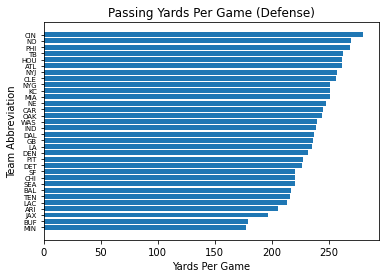

In [22]:
plt.barh(ypg['Defense'], ypg['offensePlayResult'])
plt.title('Passing Yards Per Game (Defense)')
plt.ylabel('Team Abbreviation')
plt.xlabel('Yards Per Game')
plt.yticks(fontsize = 'x-small');

We see that the Minnesota Vikings (MIN) was the stingiest of the NFL defenses against the pass, only letting up 177 yards per game! That is very solid and makes it hard for any offense to move the ball against there defense. On the other hand, the Cincinnati Bengals (CIN) were dead last in this category letting up almost 300 yards per game through the air. They have a little bit of work do to on that pass defense before they're ready to make a push for Super Bowl contention.

While we are on the subject of defense, how about we take a look at which defenses were the most successful at getting to the quarterback.

## Which Teams Had the Most/Least Sacks?

We already have our *Defense* column from the previous question, so we don't have to worry about adding it in again. We can dig right into this problem!

In [23]:
def_sacks = nfl.set_index('Defense')
def_sacks = def_sacks.rename({'passResult': 'Sacks'}, axis = 1)
def_sacks = def_sacks[def_sacks['Sacks'] == 'S'].sort_index()
def_sacks = def_sacks['Sacks'].to_frame()
def_sacks = def_sacks.groupby(by = 'Defense').count()

This looks like a lot, so let's explain. First, we set the index of the dataframe to *Defense*. Next, we renamed the *passResult* column to *Sacks*. The *passResult* column contained the information of each plays' result. The options were completed pass (C), incomplete (I), interception (Int), and sacks (S). We are only concerned with sacks, so that's why we named the column *Sacks*. We then selected every play that resulted in a sack, grouped the dataframe by *Defense* and counted the amount of times 'S' appeared when each team, respectively, was on defense. When the calculation was done, the result would be the total amount of sacks each team got in the 2018 season.

Let's take a look at it.

In [24]:
def_sacks

,Sacks
Defense,
ARI,50
ATL,40
BAL,45
BUF,37
CAR,36
CHI,50
CIN,37
CLE,42
DAL,41


This is great, but how about we take this a step further! We know the amount of sacks each team got now, but let's see how each team performed based on the average league-wide. We will compute how many sacks each team was EXPECTED to get based of league-wide statistics. So, let's get to it!

In [25]:
num_of_plays = nfl
num_of_plays = num_of_plays.set_index('Defense')
num_of_plays.rename({'passResult': 'Number of Pass Plays Against'}, axis = 1, inplace = True)
num_of_plays = num_of_plays['Number of Pass Plays Against'].to_frame()
num_of_plays = num_of_plays.groupby(by = 'Defense').count()

What we've done here is calculate how many pass plays were played against each defense across the season. This is important because to calculate the expected number of sacks, we will multiply this number by the total number of sacks across the league divided by the number of total pass plays across the league.

The value we are multiplying our number of pass plays for each team by is the percentage of plays that resulted in a sack league-wide. Across the leauge for the 2018 season, there were 1,308 sacks on 19,237 pass plays. We divided 1,308 by 19,237 and we get around 7 percent. So, around 7 percent of the pass plays resulted in a sack. We take 7 percent and multiply that by each team's number of pass plays against them and we get the expected number of sacks for each defense! Let's show how to do this!

First, we calculate how many pass plays occurred league-wide.

In [26]:
tot = nfl
tot.rename({'passResult': 'Total Pass Plays'}, axis = 1, inplace = True)
tot = tot['Total Pass Plays'].to_frame()
tot = tot['Total Pass Plays'].count()
tot

19237

Now, we compute the total number of sacks that happened across the league.

In [27]:
total_sacks = nfl
total_sacks = total_sacks.rename({'Total Pass Plays': 'Total Sacks Allowed'}, axis = 1)
total_sacks = total_sacks['Total Sacks Allowed'].to_frame()
total_sacks = total_sacks[total_sacks['Total Sacks Allowed'] == 'S'].count()
total_sacks

Total Sacks Allowed    1308
dtype: int64

Now we can compute expected sacks for each team!

Let's take all of the data we just compute and put it all into one dataframe for easy viewing.

In [28]:
defensive_sacks = pd.concat([def_sacks, num_of_plays], axis = 1)

Let's take a look.

In [29]:
defensive_sacks

,Sacks,Number of Pass Plays Against
Defense,,
ARI,50,571
ATL,40,642
BAL,45,642
BUF,37,548
CAR,36,580
CHI,50,677
CIN,37,636
CLE,42,681
DAL,41,595


Let's now make columns for each of the other variables we computed (total pass plays, total sacks, and expected sacks).

In [30]:
defensive_sacks['Total Pass Plays'] = tot
defensive_sacks['Total Sacks'] = 1308
defensive_sacks['Expected Sacks'] = defensive_sacks['Number of Pass Plays Against'] * (1308/19237)
defensive_sacks

,Sacks,Number of Pass Plays Against,Total Pass Plays,Total Sacks,Expected Sacks
Defense,,,,,
ARI,50,571,19237,1308,38.824557
ATL,40,642,19237,1308,43.652129
BAL,45,642,19237,1308,43.652129
BUF,37,548,19237,1308,37.260696
CAR,36,580,19237,1308,39.436503
CHI,50,677,19237,1308,46.031918
CIN,37,636,19237,1308,43.244165
CLE,42,681,19237,1308,46.303894
DAL,41,595,19237,1308,40.456412


We have everything we need. We computed Expected Sacks for each defense, and yes the value for Expected Sacks is supposed to be different for each team. Each defense will play a different number of passing plays and mutiplying different *Number of Pass Plays Against* values by 7% won't yield the same output.  

This dataframe looks great, but I think we can all agree that it's hard to see how each team did. How are we supposed to tell whether a team under/overperformed or was middle of the pack? Well, let's plot the data to see!

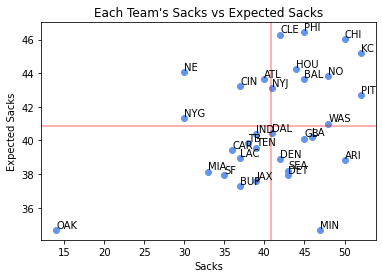

In [31]:
plt.axvline(x = defensive_sacks['Sacks'].mean(), color = 'r', alpha = 0.4)
plt.axhline(y = defensive_sacks['Expected Sacks'].mean(), color = 'r', alpha = 0.4)
plt.xlabel('Sacks')
plt.ylabel('Expected Sacks')
plt.title("Each Team's Sacks vs Expected Sacks")

for team, row in defensive_sacks.iterrows():
    plt.scatter(row['Sacks'], row['Expected Sacks'], color = 'cornflowerblue')
    plt.text(row['Sacks'], row['Expected Sacks'], team, fontsize = 'medium', horizontalalignment = 'left', verticalalignment = 'bottom')

Let's run through this code line by line real quick to see what we did!

1. Took the mean of each team's sack totals and plotted a vertical red line to represent this mean value.

2. Took the mean of each team's expected sack totals and plotted a horizontal red line to represent this mean value.

These lines will provide a definitive indicator on each team's performance. Being on the right side of the veritcal line is great. This means the defense performed above par and their high sack total equaled their already high expected sack total or if they are in the bottom right quadrant, the defense went skyrocketing over the expected sack amount (which is fantastic). The entire left side of the scatter plot is for underperforming defenses. 

3. The next three lines are for labeling the x and y axis, and for adding a title to the plot. 

4. The for loop allowed us to run through the entire **defensive_sacks** dataframe and plot each point on the scatter plot. After the point was plotted, the designated team was added in text next to the point.

## Which Offensive Lines Gave Up the Most/Least Sacks?

We will plot a similar scatter plot as the previous question, but answering a different problem. Instead of calculating how many times a defense sacked a quarterback, let's look at how many times each team's offensive line (those that protect the quarterback) allowed the defense to get a sack. 

In [32]:
sacks_allowed = nfl.set_index('Team')
sacks_allowed.rename({'Total Pass Plays': 'Sacks Allowed'}, axis = 1, inplace = True)
sacks_allowed = sacks_allowed[sacks_allowed['Sacks Allowed'] == 'S'].sort_index()
sacks_allowed = sacks_allowed['Sacks Allowed'].to_frame()
sacks_allowed = sacks_allowed.groupby(by = 'Team').count()

This is very similar to what we did in the last problem! All we did was take the **nfl** dataframe, set the index to the team that had the ball (offense), find every play that resulted in a sack, and count the number of instances an 'S' appeared in the column and assign that to the team on offense during that play. 

This should count up the amount of times a sack occurred while each team was on offense.

Let's take a look.

In [33]:
sacks_allowed

,Sacks Allowed
Team,
ARI,52
ATL,43
BAL,33
BUF,41
CAR,31
CHI,33
CIN,38
CLE,43
DAL,55


This looks great, but now let's figure out what the expected amount of sacks allowed was for each team's offense.

Just like the last problem, we will calculate the total number of offensive pass plays each team had over the course of the 2018 season.

In [34]:
pass_plays = nfl
pass_plays = pass_plays.set_index('Team')
pass_plays.rename({'Total Pass Plays': 'Number of Pass Plays'}, axis = 1, inplace = True)
pass_plays = pass_plays['Number of Pass Plays'].to_frame()
pass_plays = pass_plays.groupby(by = 'Team').count()

Let's see if it's good.

In [35]:
pass_plays

,Number of Pass Plays
Team,
ARI,556
ATL,668
BAL,607
BUF,553
CAR,604
CHI,545
CIN,599
CLE,633
DAL,602


This looks great and now we can calculate the expected amount of sacks allowed for each offense. The method for calculating this value is the exact same as before. The only thing that is different about this dataframe is that we are calculating the values for each offense, not each defense.

So, the total number of plays league-wide will be the same as will the total sacks that occurred league-wide. Since this is the case, we can use the same values we calculated earlier for these two variables and add them to this dataframe as well! Makes things a bit easier.

In [36]:
sacks_off = pd.concat([sacks_allowed, pass_plays], axis = 1)
sacks_off['Total Pass Plays'] = tot
sacks_off['Total Sacks Allowed'] = 1308
sacks_off['Expected Sacks Allowed'] = sacks_off['Number of Pass Plays'] * (1308/19237)

Now we have our final, ready to use dataframe!

In [37]:
sacks_off

,Sacks Allowed,Number of Pass Plays,Total Pass Plays,Total Sacks Allowed,Expected Sacks Allowed
Team,,,,,
ARI,52,556,19237,1308,37.804647
ATL,43,668,19237,1308,45.419972
BAL,33,607,19237,1308,41.272340
BUF,41,553,19237,1308,37.600665
CAR,31,604,19237,1308,41.068358
CHI,33,545,19237,1308,37.056714
CIN,38,599,19237,1308,40.728388
CLE,43,633,19237,1308,43.040183
DAL,55,602,19237,1308,40.932370


Now, to see which offensive lines under/overperformed or were in the middle, we need to plot the exact same scatter plot we had before (just with the offensive data this time).

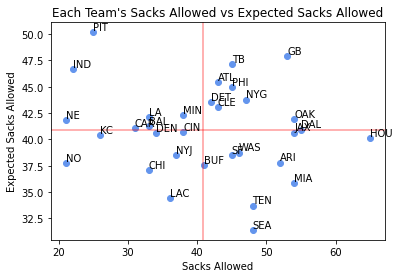

In [38]:
plt.axvline(x = sacks_off['Sacks Allowed'].mean(), color = 'r', alpha = 0.4)
plt.axhline(y = sacks_off['Expected Sacks Allowed'].mean(), color = 'r', alpha = 0.4)
plt.xlabel('Sacks Allowed')
plt.ylabel('Expected Sacks Allowed')
plt.title("Each Team's Sacks Allowed vs Expected Sacks Allowed")

for team, row in sacks_off.iterrows():
    plt.scatter(row['Sacks Allowed'], row['Expected Sacks Allowed'], color = 'cornflowerblue')
    plt.text(row['Sacks Allowed'], row['Expected Sacks Allowed'], team, fontsize = 'medium', horizontalalignment = 'left', verticalalignment = 'bottom')

Now we have our plot! The red lines represent the same thing as they did in the previous question. The vertical line represents the mean sacks allowed across every team while the horizontal line represents the mean expected sacks allowed across every team. We again, ran through our *sacks_off* dataframe using a for loop, plotting each team as a point and then labeling each point with the designated team's abbreviation. 

To put this into perspective. The teams on the right side of the veritcal line are those who did not protect the quarterback very well. The bottom right quadrant contains the worst of the teams. However, if a team made it onto the left side of the vertical line, they did a great job at keeping their quarterback upright! Those in the top left quadrant did the best job, having expected to give up a lot of sacks but only giving up a small amount.

## Conclusion

That's all we have for you! By reading this notebook, hopefully, we have explained the importance of each of these questions as well as increase your interest in the sport! Football is an amazing showcase of talent and athletic ability and it was an amazing experience to work with this type of data! We are exicted to be a part of future projects that analyze data in this way!